# Decomposing Time Series

In [11]:
import matplotlib.pyplot as plt
from statsmodels.datasets import co2
from statsmodels.tsa.seasonal import STL

In [2]:
data = co2.load().data

In [3]:
data

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


<AxesSubplot:>

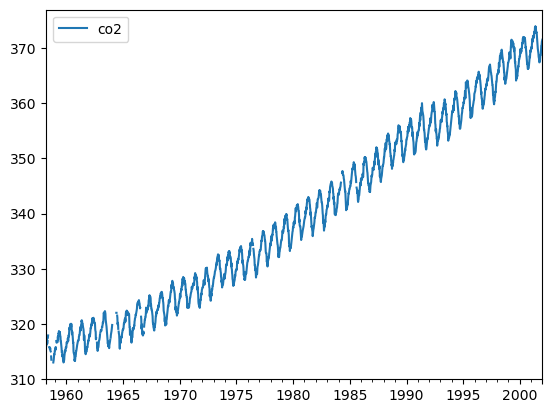

In [4]:
data.plot()

Looking at the above, there are clearly some missing values.

In [5]:
data.isna().sum()

co2    59
dtype: int64

In [6]:
data = data.resample('M').mean().ffill()

<AxesSubplot:>

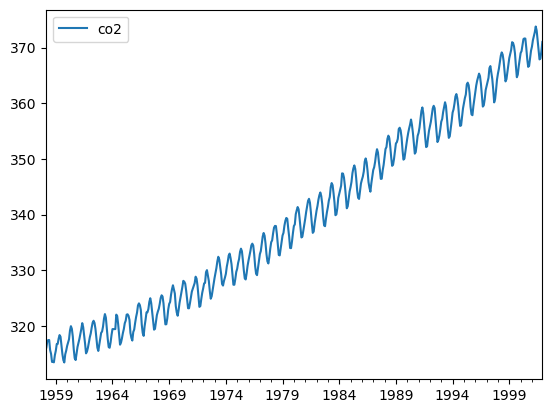

In [7]:
data.plot()

In [8]:
data.isna().sum()

co2    0
dtype: int64

There are several methods in the statsmodels library for decomposing time series.

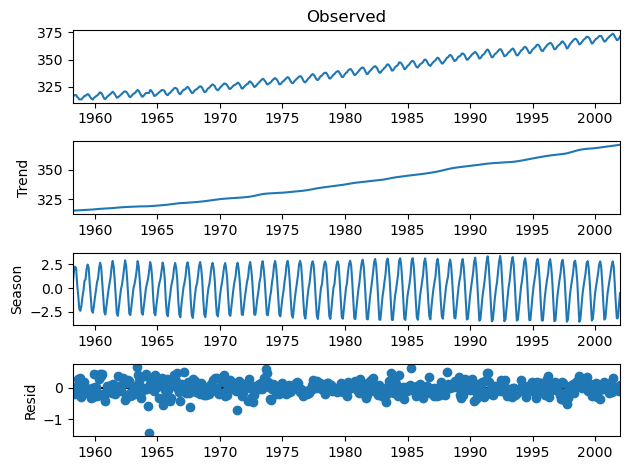

In [12]:
res = STL(data).fit()
res.plot()
plt.show()

In [13]:
data

,co2
1958-03-31,316.100000
1958-04-30,317.200000
1958-05-31,317.433333
1958-06-30,317.433333
1958-07-31,315.625000
...,...
2001-08-31,369.425000
2001-09-30,367.880000
2001-10-31,368.050000
2001-11-30,369.375000


<AxesSubplot:>

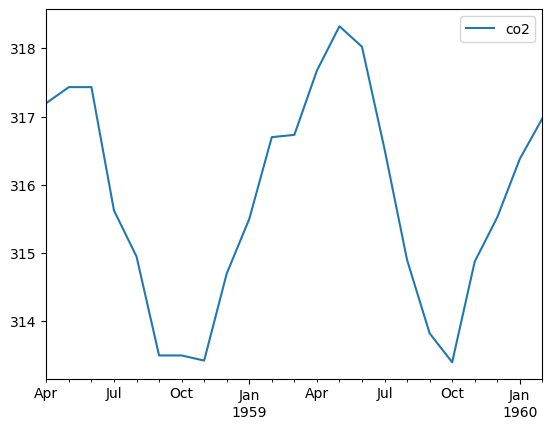

In [14]:
data[1:24].plot()

Autocorrelation


/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


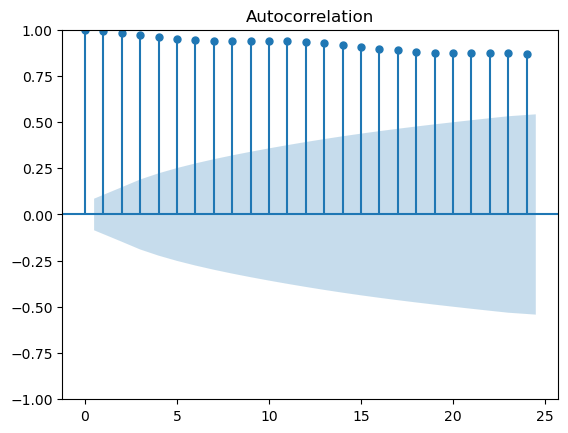

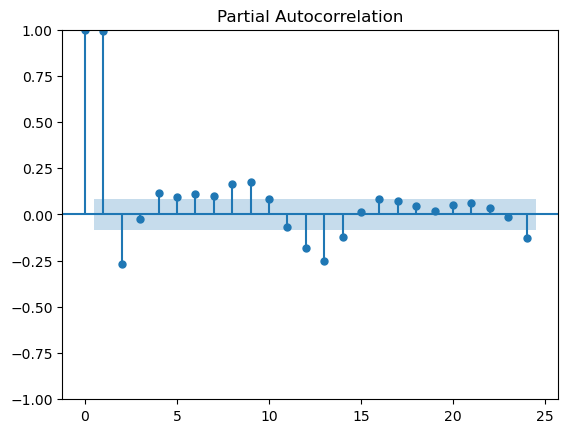

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

print('Autocorrelation')
acf_plot = plot_acf(data['co2'], lags=24, title='Autocorrelation')
pacf_plot = plot_pacf(data['co2'], lags=24, title='Partial Autocorrelation')

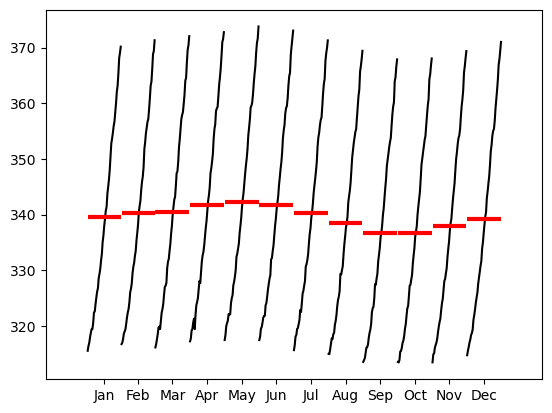

In [17]:
m_plot = month_plot(data['co2'])

What does this tell us?

How about quarterly data?

In [19]:
q_plot = quarter_plot(data['co2'])

ValueError: Expected frequency M. Got Q

We need to resample our data.  (This is a common time-series operation).

In [20]:
data_quarterly = data.resample('Q').mean()

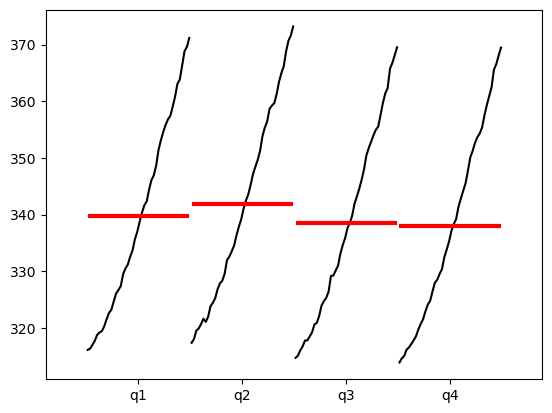

In [21]:
q_plot = quarter_plot(data_quarterly['co2'])